<a href="https://colab.research.google.com/github/RudreshVeerkhare/Data_Science_Lab/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import confusion_matrix

# Function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1) 
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max) 
    plt.xlabel('X1')
    plt.ylabel('X2') 
    plt.show()

    print('Number of support vectors: ', svc.support_.size)

Text(0, 0.5, 'X2')

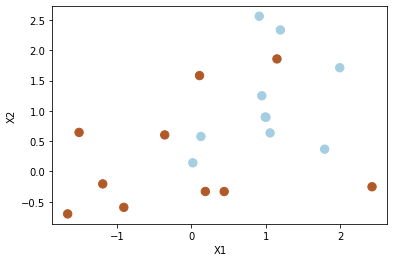

In [ ]:
from sklearn.svm import SVC

np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] + 1

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

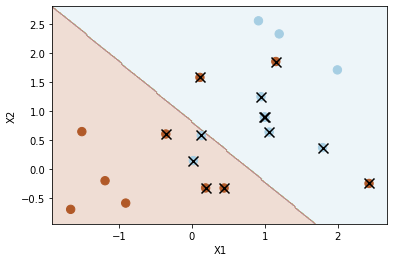

Number of support vectors:  13


In [ ]:
svc = SVC(C=1.0, kernel='linear')
svc.fit(X, y)
plot_svc(svc, X, y)

In [ ]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

when `C = 1.0` supprot vectors are 13.  
Let reduce C further to `0.1`

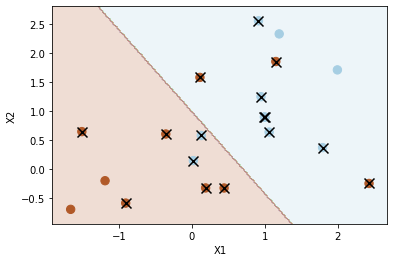

Number of support vectors:  16


In [ ]:
svc = SVC(C=0.1, kernel='linear')
svc.fit(X, y)
plot_svc(svc, X, y)

Now support vector count is 16.

In [ ]:
# Performing cross validation 10-fold
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [ ]:
clf.cv_results_ # Cross validation scores and errors for each split

{'mean_fit_time': array([0.00077164, 0.00057805, 0.00057108, 0.00058804, 0.00057447,
        0.00061376, 0.00074575]),
 'mean_score_time': array([0.00043788, 0.0003135 , 0.00031781, 0.00032101, 0.00031221,
        0.00031793, 0.00032368]),
 'mean_test_score': array([0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.75]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split5_test_sc

In [ ]:
clf.best_params_

{'C': 0.001}

In [ ]:
# Generating a test dataset
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

Text(0, 0.5, 'X2')

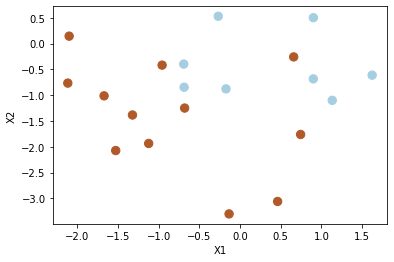

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [ ]:
# Fitting SVC with best C value
svc = SVC(C=0.001, kernel='linear')
svc.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(
    confusion_matrix(y_test, y_pred), 
    index=svc.classes_, 
    columns=['-1','+1']
)

,-1,+1
-1,2,6
1,0,12


In [ ]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred), 
    index=['Actual -1','Actual +1'], 
    columns=['Predicted -1','Predicted +1']
)

,Predicted -1,Predicted +1
Actual -1,2,6
Actual +1,0,12


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.25      0.40         8
           1       0.67      1.00      0.80        12

    accuracy                           0.70        20
   macro avg       0.83      0.62      0.60        20
weighted avg       0.80      0.70      0.64        20



Text(0, 0.5, 'X2')

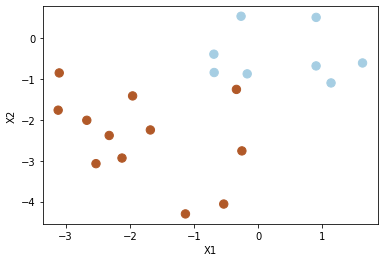

In [ ]:
# Making nearly linearly separable data
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

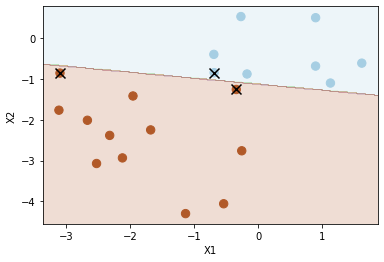

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

With higher C values margins are lower but no missclassification is performed, but this might not be the best margin

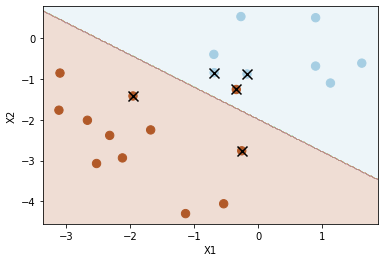

Number of support vectors:  5


In [ ]:
svc3 = SVC(C=1, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

Here the data is more linearly seperable, 5 support vectors are indentified.

## Non-Linear Data

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

Text(0, 0.5, 'X2')

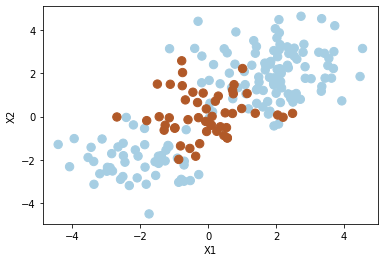

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

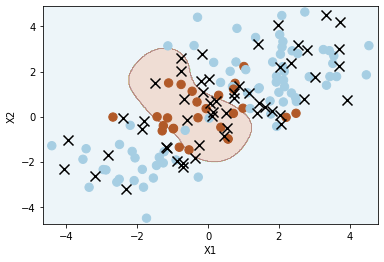

Number of support vectors:  54


In [ ]:
# Using the SVC() function with a radial kernel and γ = 1
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

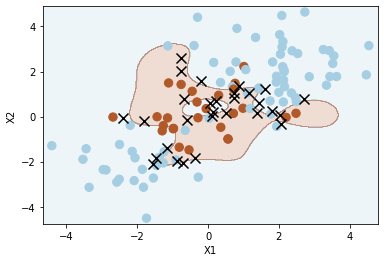

Number of support vectors:  29


In [ ]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 1, 'gamma': 0.5}